### Тестовый стенд
* **CPU:** AMD® Ryzen 7 5800h with radeon graphics × 16 @ 4.46GHz

* **RAM:** 16 GB

* **OS:** Ubuntu 22.04.4 LTS (64-bit)

### Подготовка к измерениям

**Средство измерения:** библиотека time в python3

Перед проведением серии замеров, были проделаны следующие действия по подготовке ПК:

* отключены все обновления на устройстве;
* закрыты фоновые процессы;
* была установлена максимальная частота процессора:
```
sudo cpupower frequency-set -g performance && sudo cpupower frequency-set -d 4.46GHz -u 4.46GHz
```
* выключен swap:
```
sudo swapoff -a
```
* сброшен дисковый кэш:
```
sudo sh -c 'echo 3 >/proc/sys/vm/drop_caches'
```
* программа исполнена одним ядром:
```
taskset -c 0 python3 measurescript.py
```
* совершён прогрев из 10 проходов.


**Выборка** - 40 замеров

In [1]:
t = [2.978137254714966, 2.9821996688842773, 2.9802401065826416, 2.9848153591156006, 2.9773077964782715, 2.97702956199646, 2.9790220260620117, 2.973201036453247, 2.9761404991149902, 2.9723007678985596, 2.9768781661987305, 2.978024482727051, 2.9770681858062744, 2.97615647315979, 2.9784553050994873, 2.9877724533081, 2.9774954319000244, 2.9830384254455566, 2.978109121322632, 2.9777112007141113, 2.977668523788452, 2.981020212173462, 2.9840073585510254, 2.9845879077911377, 2.9831786155700684, 2.9788289070129395, 2.978823184967041, 2.975001335144043, 2.977346181869507, 2.976118564605713, 2.9843766689300537, 2.983642578125, 2.9781949520111084, 2.9843640327453613, 2.9762635231018066, 2.983997344970703, 2.9724934101104736, 2.9744277000427246, 2.9837796688079834]

Имел место **одиночный выброс**, поэтому выборка составляет 39

In [2]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import math

(array([ 3.,  2.,  5., 12.,  3.,  2.,  2.,  8.,  1.,  1.]),
 array([2.97230077, 2.97384794, 2.9753951 , 2.97694227, 2.97848944,
        2.98003661, 2.98158378, 2.98313095, 2.98467812, 2.98622528,
        2.98777245]),
 <BarContainer object of 10 artists>)

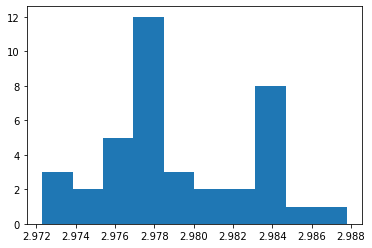

In [3]:
plt.hist(t)

In [4]:
stats.normaltest(t)

NormaltestResult(statistic=1.8117323339904154, pvalue=0.40419163598297525)

In [5]:
stats.shapiro(t)

ShapiroResult(statistic=0.9454030316221977, pvalue=0.057580535205669636)

В обоих тестах pvalue > 0.05

**Среднее:**

In [6]:
np.mean(t)

2.9792108716231125

**Стандартное отклонение:**

In [7]:
np.std(t, ddof=1)

0.0038344670547130672

**Стандартное отклонение среднего:**

In [8]:
np.std(t, ddof=1)/math.sqrt(len(t))

0.0006140061302976335

**Доверительный интервал 95%:**

In [9]:
stats.t.ppf(0.975, df = len(t) - 1)*stats.sem(t)

0.0012429904267807013

Итак, полученные данные с учётом округления:

**2.9792 ± 0.0012**
